# Review

Solve the following exercises using R. You may use any library that has been covered in this workshop so far.

In [107]:
options(repr.plot.width=4, repr.plot.height=3)

**1**. Construct an R vector from $\pi$ to $2\pi$ consisting of 8 equally spaced values.

In [3]:
seq(pi, 2*pi, length.out = 8)

[1] 3.141593 3.590392 4.039191 4.487990 4.936788 5.385587 5.834386 6.283185

**2**. Write a function `dist(a, b)` that calculates the Euclidean distance between the vectors $a$ and $b$. For example, `dist(c(0,3), c(4,0))` should be 5.

In [7]:
dist <- function(a, b) {
    return (sqrt(sum((a - b)^2)))
}

In [8]:
dist(c(0,3), c(4,0))

[1] 5

**3**. A Pythagorean triplet consists of three non-negative integers (a, b, c) such that $a^2 + b^2 = c^2$. For example, (3, 4, 5) is a Pythagorean triplet since $3^2 + 4^2 = 5^2$. Find all unique Pythagorean triplets where $a$, $b$ and $c$ are all less than or equal to 50.

In [19]:
n <- 50

for (a in 1:n) {
    for (b in a:n) {
        for (c in b:n) {
            if (a^2 + b^2 == c^2) {
                print(c(a, b, c))
            }
        }
    }
}

[1] 3 4 5
[1]  5 12 13
[1]  6  8 10
[1]  7 24 25
[1]  8 15 17
[1]  9 12 15
[1]  9 40 41
[1] 10 24 26
[1] 12 16 20
[1] 12 35 37
[1] 14 48 50
[1] 15 20 25
[1] 15 36 39
[1] 16 30 34
[1] 18 24 30
[1] 20 21 29
[1] 21 28 35
[1] 24 32 40
[1] 27 36 45
[1] 30 40 50


**4**. Replace the word "nice" with "mean" in the given string.

In [15]:
s = "The average statistician is nice"

In [16]:
library(stringr)

In [17]:
str_replace(s, "nice", "mean")

[1] "The average statistician is mean"

**5**. Create and save a data frame in the variable `df` with two columns $x$ and $y$ where $x$ consists of the numbers 1,2,3,4,5,1,2,3,4,5 and $y$ is a random number drawn from a normal distribution with mean $x$ and standard deviation 1. Set the random seed to 123 so that these numbers can be reproduced.

In [50]:
seed <- 123
set.seed(seed)
x <- c(1:5, 1:5)
n <- length(x)
y <- rnorm(n, mean=x, sd=1)
df <- data.frame(x=x, y=y)
df

x         y
1  1 0.4395244
2  2 1.7698225
3  3 4.5587083
4  4 4.0705084
5  5 5.1292877
6  1 2.7150650
7  2 2.4609162
8  3 1.7349388
9  4 3.3131471
10 5 4.5543380

**6**. Show 5 random rows from the data frame created in **5**.

In [51]:
library(dplyr)

In [52]:
sample_n(df, size=5)

x        y
9  4 3.313147
7  2 2.460916
6  1 2.715065
10 5 4.554338
4  4 4.070508

**7**. Create a new data.frame `df1` from `df` with an extra column $z$ in `df` whose value is "male" if $x < y$ and "female" otherwise.

In [58]:
df1 <- df %>% mutate(z = ifelse(x < y, "male", "female"))
df1

x         y      z
1  1 0.4395244 female
2  2 1.7698225 female
3  3 4.5587083   male
4  4 4.0705084   male
5  5 5.1292877   male
6  1 2.7150650   male
7  2 2.4609162   male
8  3 1.7349388 female
9  4 3.3131471 female
10 5 4.5543380 female

**8.** Create a data frame showing the mean value of $y$ for males and females. Name two columns `sex` (with `male` or `female`) and `yhat` (with means).

In [59]:
library(tidyr)

In [78]:
df1 %>% group_by(z) %>% summarise(yhat = mean(y)) %>% rename(sex = z)

sex     yhat
1 female 2.362354
2   male 3.786897

**9**. Convert `df1` from a tall to a wide format by using the information from `z` to create two new columns `male` and `female` where each column contains the value of `y`.

In [80]:
df1 %>% spread(key=z, value=y)

x    female     male
1 1 0.4395244 2.715065
2 2 1.7698225 2.460916
3 3 1.7349388 4.558708
4 4 3.3131471 4.070508
5 5 4.5543380 5.129288

**10**. Download the CSV file from "http://www.ats.ucla.edu/stat/data/binary.csv" into a file called "binary.csv" in the local directory read it into an R data frame called `admit`. Show the first 6 rows. This is data for admission to graduate school based on GRE scores, GPA and class rank.

In [82]:
url <- "http://www.ats.ucla.edu/stat/data/binary.csv"
download.file(url, "binary.csv")
admit <- read.csv("binary.csv")

In [84]:
head(admit, n=6)

admit gre  gpa rank
1     0 380 3.61    3
2     1 660 3.67    3
3     1 800 4.00    1
4     1 640 3.19    4
5     0 520 2.93    4
6     1 760 3.00    2

**11**. Fit a GLM to the data using only GRE as a predictor of admission. Based on this model, predict the prbabilty of admission for GREs with values 600, 610, 620, ..., 800.

In [87]:
fit <- glm(admit ~ gre, family=binomial(link="logit"), data=admit)

In [91]:
predict(fit, newdata = data.frame(gre=seq(600, 800, by=10)), type="response")

1         2         3         4         5         6         7         8 
0.3203819 0.3282314 0.3361781 0.3442185 0.3523492 0.3605664 0.3688660 0.3772440 
        9        10        11        12        13        14        15        16 
0.3856960 0.3942175 0.4028038 0.4114501 0.4201514 0.4289026 0.4376986 0.4465338 
       17        18        19        20        21 
0.4554030 0.4643005 0.4732209 0.4821583 0.4911072

**12**. Plot separate scatter plots of GRE against GPA with a fitted linear regression fit for admitted and non-admitted status.

In [110]:
library(ggplot2)

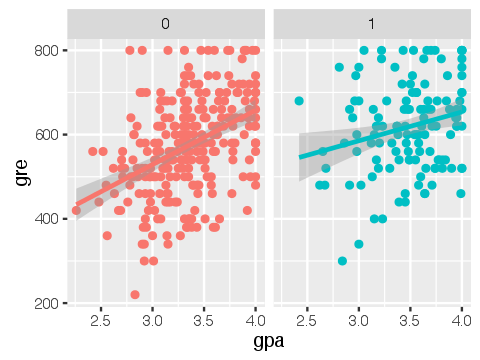

In [117]:
ggplot(admit, aes(x=gpa, y=gre, color=as.factor(admit))) + 
geom_point() +
geom_smooth(method="lm") +
facet_wrap(~ admit) +
guides(color=F)

**13**. How would you test the hypothesis that GRE scores are not the same among those admitted to and those rejected from graduate school?

In [118]:
t.test(admit$gre[admit$admit == 0], admit$gre[admit$admit ==1])


	Welch Two Sample t-test

data:  admit$gre[admit$admit == 0] and admit$gre[admit$admit == 1]
t = -3.8292, df = 260.18, p-value = 0.0001611
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -69.21683 -22.20482
sample estimates:
mean of x mean of y 
 573.1868  618.8976 


**14**. What is the effect size for GRE observed in the `admit` data set? What sample size would be needed to test the hypothesis that GRE scores are different using this effect size using the two-sided Welch t-test with power = 0.9 and significance level = 0.05?

In [126]:
stats <- admit %>% group_by(admit) %>% summarise(mu = mean(gre), sd = sd(gre))
d <- (stats$mu[2] - stats$mu[1])/sqrt((stats$sd[1]^2 + stats$sd[2]^2)/2)
d

[1] 0.4066394

In [127]:
library(pwr)

In [128]:
pwr.t.test(d=d, power=0.9, sig.level = 0.05)


     Two-sample t test power calculation 

              n = 128.0568
              d = 0.4066394
      sig.level = 0.05
          power = 0.9
    alternative = two.sided

NOTE: n is number in *each* group


**15**. Below are some (made-up) p values representing the results of comparing $n$ genes across a treatement and control group. How often would you reject the null hypothesis using

- Raw p values
- Bonferroni FWER
- Benjamin-Hochberg FDR

using a cutoff of 0.05 as usual?

In [157]:
set.seed(123)
n <- 10000
p <- runif(n)^2
p <- sort(p)
print(p[1:6])

[1] 4.268885e-09 8.787570e-09 2.165497e-07 3.903417e-07 6.824568e-07
[6] 6.871808e-07


In [158]:
library(multtest)

In [159]:
adjp <- mt.rawp2adjp(p, proc=c("Bonferroni", "BH"))
colSums(adjp$adjp < 0.05)

rawp Bonferroni         BH 
      2216         23        540